In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.isna().sum() 
df['high_income']
y_train = df.pop('high_income')
X_train = df

In [2]:
test_df = pd.read_csv('test.csv')
test_df.columns
X_test = test_df

In [3]:
# X_train = X_train.iloc[:, 1:]
X_train

,id,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,...,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,1,0,42.0,0.0,NaN,Nonfiler,Householder,NaN,All other,11th grade,...,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Householder,0,2
1,2,18,56.0,NaN,NaN,NaN,Householder,NaN,All other,High school graduate,...,Married-civilian spouse present,Not in universe,NaN,United-States,Sales,Full-time schedules,NaN,Householder,1,2
2,3,26,26.0,NaN,NaN,Joint both under 65,Householder,NaN,All other,High school graduate,...,NaN,Not in universe,NaN,Haiti,Adm support including clerical,Full-time schedules,NaN,Householder,3,2
3,4,0,67.0,NaN,MSA to MSA,Joint one under 65 & one 65+,Householder,No,All other,NaN,...,NaN,Northeast,Same county,United-States,Not in universe,Children or Armed Forces,0.0,Householder,0,1
4,5,0,NaN,NaN,Nonmover,Nonfiler,Child under 18 never married,Not in universe,All other,Children,...,NaN,Not in universe,Nonmover,United-States,Not in universe,Children or Armed Forces,NaN,Child <18 never marr not in subfamily,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54602,54603,2,NaN,NaN,Nonmover,NaN,Householder,Not in universe,All other,NaN,...,Married-civilian spouse present,Not in universe,Nonmover,United-States,Executive admin and managerial,Children or Armed Forces,NaN,Householder,4,2
54603,54604,0,32.0,0.0,NaN,Nonfiler,Householder,NaN,All other,High school graduate,...,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Nonfamily householder,0,2
54604,54605,0,22.0,NaN,Nonmover,NaN,Child 18 or older,Not in universe,All other,Some college but no degree,...,Never married,Not in universe,Nonmover,United-States,Not in universe,Children or Armed Forces,12.0,Child 18+ never marr Not in a subfamily,1,2
54605,54606,0,4.0,0.0,NaN,Nonfiler,Child under 18 never married,NaN,All other,Children,...,NaN,Not in universe,NaN,Trinadad&Tobago,Not in universe,Children or Armed Forces,0.0,Child <18 never marr not in subfamily,0,0


In [4]:
from sklearn.impute import SimpleImputer

# numerics = ['int16', 'int32', 'int64']
# df = df.select_dtypes(include=numerics)

si_numeric = SimpleImputer()
df_numeric = X_train._get_numeric_data()
df_numeric = si_numeric.fit_transform(df_numeric)
X_train_numeric = pd.DataFrame(df_numeric, columns=X_train._get_numeric_data().columns)

X_train_numeric.isna().sum()

id                 0
occ_code_level2    0
age                0
stock_dividends    0
wage_per_hour      0
capital_losses     0
own_or_self        0
ind_code_level2    0
capital_gains      0
weeks_worked       0
num_emp            0
vet_benefits       0
dtype: int64

In [5]:
si_categorical = SimpleImputer(strategy='most_frequent')

X_train_categorical = X_train[X_train.columns.difference(X_train._get_numeric_data().columns)]
train_column_names = X_train_categorical.columns
categorical_features = si_categorical.fit_transform(X_train_categorical)
X_train_categorical = pd.DataFrame(categorical_features, columns=X_train_categorical.columns)
X_train_categorical.isna().sum()

citizenship         0
class_worker        0
country_father      0
country_mother      0
country_self        0
det_hh_fam_stat     0
det_hh_summ         0
education           0
fam_under_18        0
full_or_part_emp    0
hisp_origin         0
hs_college          0
ind_code_level1     0
marital_stat        0
mig_chg_msa         0
mig_chg_reg         0
mig_move_reg        0
mig_prev_sunbelt    0
mig_same            0
occ_code_level1     0
race                0
region_prev_res     0
sex                 0
state_prev_res      0
tax_filer_stat      0
unemp_reason        0
union_member        0
vet_question        0
dtype: int64

In [6]:
import seaborn as sns

corr_matrix = X_train_numeric.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,occ_code_level2,age,stock_dividends,wage_per_hour,capital_losses,own_or_self,ind_code_level2,capital_gains,weeks_worked,num_emp,vet_benefits
id,1.000000,-0.002178,0.001244,-0.004302,0.000015,0.008971,-0.000276,0.000994,0.004518,-0.000061,-0.002424,0.002042
occ_code_level2,-0.002178,1.000000,0.070296,-0.019150,0.128368,0.028129,0.177194,0.424268,0.007563,0.411261,0.398632,0.382120
age,0.001244,0.070296,1.000000,0.028820,0.014555,0.017777,0.001480,0.127563,0.017856,0.165453,0.116700,0.503839
stock_dividends,-0.004302,-0.019150,0.028820,1.000000,0.004466,0.008478,-0.005771,0.018199,0.008669,0.017115,0.009005,0.051750
wage_per_hour,0.000015,0.128368,0.014555,0.004466,1.000000,0.010493,0.044665,0.107318,0.005932,0.058476,0.120113,0.078764
capital_losses,0.008971,0.028129,0.017777,0.008478,0.010493,1.000000,0.027968,0.077275,0.009377,0.031944,0.087524,0.075951
own_or_self,-0.000276,0.177194,0.001480,-0.005771,0.044665,0.027968,1.000000,0.221604,0.013822,0.175417,0.195025,0.159007
ind_code_level2,0.000994,0.424268,0.127563,0.018199,0.107318,0.077275,0.221604,1.000000,0.082761,0.558704,0.591184,0.474745
capital_gains,0.004518,0.007563,0.017856,0.008669,0.005932,0.009377,0.013822,0.082761,1.000000,0.031645,0.061591,0.059968
weeks_worked,-0.000061,0.411261,0.165453,0.017115,0.058476,0.031944,0.175417,0.558704,0.031645,1.000000,0.551817,0.434225


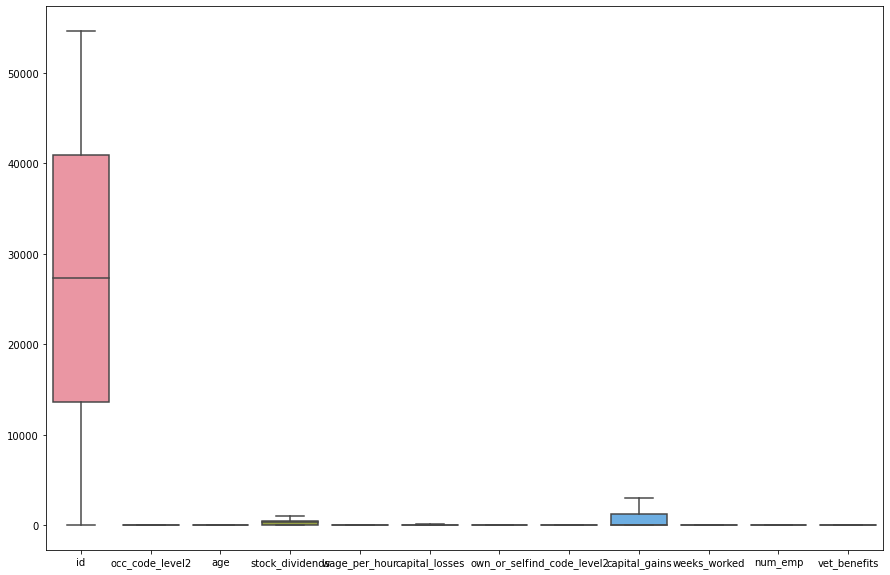

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

p = sns.boxplot(data=X_train_numeric, showfliers=False)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train_numeric)
X_train_numeric = pd.DataFrame(scaled_features, columns=X_train_numeric.columns)
X_train_numeric

,id,occ_code_level2,age,stock_dividends,wage_per_hour,capital_losses,own_or_self,ind_code_level2,capital_gains,weeks_worked,num_emp,vet_benefits
0,-1.732019,-0.827102,3.336430e-01,-1.722629e-01,-2.608265e-01,0.000000,-0.344443,-1.026691,-0.194292,-1.531480e+00,-1.008107,0.476955
1,-1.731956,0.472406,1.223516e+00,-2.391037e-17,-2.608265e-01,0.000000,3.097908,0.712314,0.000000,-3.875967e-16,-0.603743,0.476955
2,-1.731892,1.049965,-6.833552e-01,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,1.201410,0.000000,-3.875967e-16,0.204985,0.476955
3,-1.731829,-0.827102,1.922703e+00,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,-1.026691,-0.194292,-1.531480e+00,-1.008107,-0.830922
4,-1.731765,-0.827102,4.516379e-16,-2.391037e-17,-2.608265e-01,-0.248851,-0.344443,-1.026691,-0.194292,-3.875967e-16,-1.008107,-2.138799
...,...,...,...,...,...,...,...,...,...,...,...,...
54602,1.731765,-0.682712,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,3.097908,0.331907,0.000000,-3.875967e-16,0.609349,0.476955
54603,1.731829,-0.827102,-3.019809e-01,-1.722629e-01,-4.994270e-17,-0.248851,-0.344443,-1.026691,-0.194292,-1.531480e+00,-1.008107,0.476955
54604,1.731892,-0.827102,-9.376048e-01,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,-1.026691,0.000000,-8.768872e-01,-0.603743,0.476955
54605,1.731956,-0.827102,-2.081728e+00,-1.722629e-01,-2.608265e-01,-0.248851,-0.344443,-1.026691,-0.194292,-1.531480e+00,-1.008107,-2.138799


In [9]:
# X_train_categorical = pd.get_dummies(X_train_categorical, drop_first=True)

In [10]:
#df_merged = pd.concat([X_train_numeric, X_train_categorical], axis=1)
#df_merged

In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first')
#train dataset
X_train_categorical = enc.fit_transform(X_train_categorical)
#test dataset
#X_test_categorical = enc.transform(X_test_categorical)

In [12]:
X_train_categorical = pd.DataFrame(X_train_categorical.toarray(), columns=enc.get_feature_names(input_features=train_column_names))
X_train_categorical

df_merged = pd.concat([X_train_numeric, X_train_categorical], axis=1)

In [13]:
# numerics = ['int16', 'int32', 'int64']
# df = df.select_dtypes(include=numerics)

df_test_numeric = X_test._get_numeric_data()
df_test_numeric = si_numeric.transform(df_test_numeric)
X_test_numeric = pd.DataFrame(df_test_numeric, columns=X_test._get_numeric_data().columns)

X_test_numeric.isna().sum()

id                 0
occ_code_level2    0
age                0
stock_dividends    0
wage_per_hour      0
capital_losses     0
own_or_self        0
ind_code_level2    0
capital_gains      0
weeks_worked       0
num_emp            0
vet_benefits       0
dtype: int64

In [14]:
X_test_categorical = X_test[X_test.columns.difference(X_test._get_numeric_data().columns)]
columns_names = X_test_categorical.columns
categorical_features = si_categorical.transform(X_test_categorical)
X_test_categorical = pd.DataFrame(categorical_features, columns=X_test_categorical.columns)
X_test_categorical.isna().sum()

citizenship         0
class_worker        0
country_father      0
country_mother      0
country_self        0
det_hh_fam_stat     0
det_hh_summ         0
education           0
fam_under_18        0
full_or_part_emp    0
hisp_origin         0
hs_college          0
ind_code_level1     0
marital_stat        0
mig_chg_msa         0
mig_chg_reg         0
mig_move_reg        0
mig_prev_sunbelt    0
mig_same            0
occ_code_level1     0
race                0
region_prev_res     0
sex                 0
state_prev_res      0
tax_filer_stat      0
unemp_reason        0
union_member        0
vet_question        0
dtype: int64

In [15]:
scaled_features = scaler.transform(X_test_numeric)
X_test_numeric = pd.DataFrame(scaled_features, columns=X_test_numeric.columns)
X_test_numeric

,id,occ_code_level2,age,stock_dividends,wage_per_hour,capital_losses,own_or_self,ind_code_level2,capital_gains,weeks_worked,num_emp,vet_benefits
0,-1.732019,-0.827102,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,-1.026691,0.000000,-1.531480e+00,-1.008107,0.476955
1,-1.731956,1.410939,4.516379e-16,1.263884e-01,-2.608265e-01,-0.248851,-0.344443,1.092722,0.000000,-3.875967e-16,1.418076,0.476955
2,-1.731892,1.555329,4.516379e-16,-2.391037e-17,-4.994270e-17,0.000000,-0.344443,-0.809315,0.000000,1.305088e+00,0.204985,0.476955
3,-1.731829,-0.682712,1.032829e+00,-1.722629e-01,-4.994270e-17,0.000000,-0.344443,1.418785,-0.194292,1.305088e+00,-0.603743,0.476955
4,-1.731765,2.349472,4.516379e-16,-2.391037e-17,-2.608265e-01,-0.248851,3.097908,-0.972347,0.000000,1.305088e+00,1.013712,0.476955
...,...,...,...,...,...,...,...,...,...,...,...,...
6063,-1.347401,1.555329,1.477766e+00,-1.722629e-01,-4.994270e-17,0.000000,-0.344443,1.038378,0.000000,-1.677452e-01,-0.603743,0.476955
6064,-1.347337,0.472406,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,0.712314,-0.194292,-3.875967e-16,0.204985,0.476955
6065,-1.347274,0.400211,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,0.984034,-0.194292,-3.875967e-16,0.609349,0.476955
6066,-1.347211,-0.827102,-1.112937e-01,-1.722629e-01,-2.608265e-01,-0.248851,-0.344443,-1.026691,-0.194292,-1.531480e+00,-1.008107,0.476955


In [16]:
#X_test_categorical = pd.get_dummies(X_test_categorical, drop_first=True)
X_test_categorical = enc.transform(X_test_categorical)
X_test_categorical

<6068x355 sparse matrix of type '<class 'numpy.float64'>'
	with 155229 stored elements in Compressed Sparse Row format>

In [17]:
X_test_categorical = pd.DataFrame(X_test_categorical.toarray(), columns=enc.get_feature_names(input_features=columns_names))
# X_test_categorical

df_test_merged = pd.concat([X_test_numeric, X_test_categorical], axis=1)
df_test_merged

,id,occ_code_level2,age,stock_dividends,wage_per_hour,capital_losses,own_or_self,ind_code_level2,capital_gains,weeks_worked,...,tax_filer_stat_Single,unemp_reason_Job loser - on layoff,unemp_reason_New entrant,unemp_reason_Not in universe,unemp_reason_Other job loser,unemp_reason_Re-entrant,union_member_Not in universe,union_member_Yes,vet_question_Not in universe,vet_question_Yes
0,-1.732019,-0.827102,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,-1.026691,0.000000,-1.531480e+00,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.731956,1.410939,4.516379e-16,1.263884e-01,-2.608265e-01,-0.248851,-0.344443,1.092722,0.000000,-3.875967e-16,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.731892,1.555329,4.516379e-16,-2.391037e-17,-4.994270e-17,0.000000,-0.344443,-0.809315,0.000000,1.305088e+00,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.731829,-0.682712,1.032829e+00,-1.722629e-01,-4.994270e-17,0.000000,-0.344443,1.418785,-0.194292,1.305088e+00,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.731765,2.349472,4.516379e-16,-2.391037e-17,-2.608265e-01,-0.248851,3.097908,-0.972347,0.000000,1.305088e+00,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,-1.347401,1.555329,1.477766e+00,-1.722629e-01,-4.994270e-17,0.000000,-0.344443,1.038378,0.000000,-1.677452e-01,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6064,-1.347337,0.472406,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,0.712314,-0.194292,-3.875967e-16,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6065,-1.347274,0.400211,4.516379e-16,-2.391037e-17,-2.608265e-01,0.000000,-0.344443,0.984034,-0.194292,-3.875967e-16,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6066,-1.347211,-0.827102,-1.112937e-01,-1.722629e-01,-2.608265e-01,-0.248851,-0.344443,-1.026691,-0.194292,-1.531480e+00,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
df_merged.shape, df_test_merged.shape

((54607, 367), (6068, 367))

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

grid = {'criterion': ['gini', 'entropy']}
#        'max_depth': [5, 10, 15, 20, 30],
#        'max_features': [5, 10, 15, 30, 50, 100]}

dtc_cv = GridSearchCV(
                    verbose=2,
                    estimator=tree.DecisionTreeClassifier(),
                    param_grid=grid,
                    cv=5
                     )

dtc_cv.fit(df_merged, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................criterion=gini; total time=   1.7s
[CV] END .....................................criterion=gini; total time=   1.7s
[CV] END .....................................criterion=gini; total time=   1.6s
[CV] END .....................................criterion=gini; total time=   1.7s
[CV] END .....................................criterion=gini; total time=   1.6s
[CV] END ..................................criterion=entropy; total time=   1.3s
[CV] END ..................................criterion=entropy; total time=   1.4s
[CV] END ..................................criterion=entropy; total time=   1.4s
[CV] END ..................................criterion=entropy; total time=   1.4s
[CV] END ..................................criterion=entropy; total time=   1.4s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, verbose=2)

In [32]:
dtc_cv.best_score_
dtc_cv.best_estimator_
# dtc_cv.predict(df_test_merged)

DecisionTreeClassifier(criterion='entropy')

In [18]:
# clf = 
# clf.fit(df_merged, y_train)

#grid search, cross-validation
#transform test dataset